## Data Cleaning and merging dataframes

In this notebook, we'll work with `movie_basics` and `movie_ratings` tables from `'im.db'`. As well as `'tn.movie_budget.csv'`.

Before we can get going, we'll need to import the relevant packages and conncet to the database.

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline
import sqlite3
conn = sqlite3.connect('im.db')

In this notebook we'll focus on the `movie_basics` and `movie_ratings`.

## Compared to the Individual Tables:

### `movie_basics` Table:

In [147]:
q = """
SELECT *
FROM movie_basics
"""
pd.read_sql(q, conn).head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


### `movie_ratings` Table:

In [88]:
q = """
SELECT *
FROM movie_ratings
"""
pd.read_sql(q, conn).head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Displaying movie_basics Along with movie_ratings

Since we need to generate a table that includes details about ` movie_basics`  and ` movie_ratings`, we would need to take data from multiple tables in a single statement using a concise way to join the tables, the `USING` clause. Which in this case is `movie_id`. Again, this only works if the column is **identically named** for both tables.

Then we assign the result of the querry to a variable names `df`, which is a dataframe. 

In [117]:
q = """
SELECT
    movie_id, 
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
"""
df = pd.read_sql(q, conn)

(73856, 5)

To get a concise summary of the dataframe, you can use `.info()`: 

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   primary_title  73856 non-null  object 
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


## Nan (Not a Number):
When working with datasets, it is common to have missing or `NaN (Not a Number)` values. In order to understand the extent of missing data in a dataset, you can use the `.isna()` method to identify where the `NaN` values are located. Taking the `.sum()` of the `.isna(`) method will return the total number of NaN values in the dataset broken down by column.

In [149]:
df.isna().sum()

movie_id           0
primary_title      0
genres           804
averagerating      0
numvotes           0
dtype: int64

Since the `'genre'` is a categorical data and the missing values accounts for only 1 % of our data we decided to drop the rows that contained null values using the built-in function `.dropna()`. Since we are creating a new df, a new name will be given to it as `df_nonull_genres`.

In [8]:
df_nonull_genres = df.dropna(axis = 0)

Lets display the total number of `NaN` values in the dataset broken down by column.

In [9]:
df_nonull_genres.isna().sum()

movie_id         0
primary_title    0
genres           0
averagerating    0
numvotes         0
dtype: int64

Since, we dont have any other missing data to deal with, lets take a look on the second dataframe.

The second `df` can be found on `'tn.movie_budget.csv'`. Now, let's get started by reading in the data  and storing it the DataFrame `movie_budget`. Afterwárds, lets preview the data.

In [154]:
movie_budget = pd.read_csv('tn.movie_budgets.csv')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,1-May-15,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


`production_budget`, `domestic_gross`, and `worldwide_gross` are strings, so we will remove the commas and dollar signs

In [ ]:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '')

`production_budget`, `domestic_gross`, and `worldwide_gross` are still strings, so we will change them to integers to be able to perform calculations with those columns

In [ ]:

movie_budget['production_budget'] = movie_budget['production_budget'].astype('int64')
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].astype('int64')
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].astype('int64')

A concise summary will be provided using `.info()`.

In [155]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The above summary contains also the amount of null values brake down by columns. Since we don´t have any we can move into merging `movie_budget`df and `df_nonull_genres` df. 

For doing so, lets print a short preview for both Dataframes. Focus on the column names.

`df_nonull_genres` df:

In [167]:
df_nonull_genres.head(2)

,movie_id,movie,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43


`movie_budget` df:

In [169]:
movie_budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


As you can see, the column which displays the movie title is different in both Dataframes. `df_nonull_genres` uses `'primary_title'`while `movie_budget` uses `'movie'`. 

We need to set them equal to use the column name as a key for merging both Dataframes into one. Will set both columns names as `'movie'`. In this case,  `df_nonull_genres` is the one selected to change its column name. 

In [12]:
df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)

C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\174632230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonull_genres.rename(columns={'primary_title' : 'movie'}, inplace = True)


Lets view the column labels of the DataFrame `df_nonull_genres`.

In [170]:
df_nonull_genres.columns

Index(['movie_id', 'movie', 'genres', 'averagerating', 'numvotes'], dtype='object')

As you see, now the column name was changed succesfully. 

## Nan (Not a Number):

The following line of code is performing a merge operation between  `df_nonull_genre`s and `movie_budget`.

The merge is performed based on a common column called `'movie'`, specified by the `on` parameter.

The type of merge used is specified by the how parameter, which in this case is set to `'left'`, meaning that all the rows from the `df_nonull_genres dataframe` will be kept and any matching rows from the `movie_budget` dataframe will be included. Any non-matching rows from the movie_budget dataframe will have null values in the resulting dataframe.

Finally, a new column called `'im_and_movie_budget'` is added to the resulting merged dataframe, indicating whether a row is present in both dataframes (i.e., 'both'), only in the left dataframe (i.e., 'left_only'), or only in the right dataframe (i.e., 'right_only'). This is specified by the `indicator` parameter.

The resulting dataframe is assigned to the variable `im_movie_budget`. Subsequently, we use `value_counts()` to return a new Series object with the count of unique values of the new column called `'im_and_movie_budget'`.

In [171]:
im_movie_budget = pd.merge(df_nonull_genres ,movie_budget, on='movie', how='left', indicator = 'im_and_movie_budget')
im_movie_budget['im_and_movie_budget'].value_counts()

left_only     70307
both           2867
right_only        0
Name: im_and_movie_budget, dtype: int64

A sample was taken from Dataframe `im_movie_budget` by selecting rows that has a string value equal to `both`on column `'im_and_movie_budget'`. That sample name is `cleaned_df`.

In [172]:
cleaned_df = im_movie_budget[im_movie_budget['im_and_movie_budget'] == 'both'] 
cleaned_df

,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,31-Dec-12,"$45,000,000",$0,"$73,706",both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,22-Mar-13,"$25,000,000","$720,828","$9,313,302",both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",both
46,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,67.0,19-Sep-14,"$28,000,000","$26,017,685","$62,108,587",both
47,tt0369610,Jurassic World,"Action,Adventure,Sci-Fi",7.0,539338,34.0,12-Jun-15,"$215,000,000","$652,270,625","$1,648,854,864",both
...,...,...,...,...,...,...,...,...,...,...,...
72971,tt9746500,Earth,Documentary,7.3,49,36.0,22-Apr-09,"$47,000,000","$32,011,576","$116,773,317",both
73096,tt9851050,Sisters,"Action,Drama",4.7,14,57.0,18-Dec-15,"$30,000,000","$87,044,645","$106,030,660",both
73111,tt9861522,Ali,Drama,7.7,79,45.0,25-Dec-01,"$109,000,000","$58,183,966","$87,683,966",both
73151,tt9899880,Columbus,Comedy,5.8,5,93.0,4-Aug-17,"$700,000","$1,017,107","$1,110,511",both


Lets get a concise summary of the dataframe using `.info()`: 

In [20]:
cleaned_df.isna().sum()

movie_id               0
movie                  0
genres                 0
averagerating          0
numvotes               0
id                     0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
im_and_movie_budget    0
dtype: int64

At this point, we are all set to begin with the Eploratory Data Analisis.

In [22]:
cleaned_df.head(3)

,movie_id,movie,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,im_and_movie_budget
16,tt0249516,Foodfight!,"Action,Animation,Comedy",1.9,8248,26.0,31-Dec-12,"$45,000,000",$0,"$73,706",both
36,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,17.0,22-Mar-13,"$25,000,000","$720,828","$9,313,302",both
42,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,37.0,25-Dec-13,"$91,000,000","$58,236,838","$187,861,183",both


C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\3662766325.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cleaned_df['production_budget'] = cleaned_df['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\3662766325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['production_budget'] = cleaned_df['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\3662766325.py:3: FutureWarning: The default value of regex will change from 

C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\1954955143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['production_budget'] = cleaned_df['production_budget'].astype('int64')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\1954955143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['domestic_gross'] = cleaned_df['domestic_gross'].astype('int64')
C:\Users\raguilarsoriano\AppData\Local\Temp\ipykernel_24660\1954955143.py:4: SettingWithCopyWarning: 
A valu

We will define a function named `stats` to define the `mean`, `median`, and `standard deviation` of a given column of the dataframe

In [37]:
def stats(column):

    """This function takes a pandas dataframe
    and the name of a column as inputs, and returns a new dataframe with 
        the specified column sorted in descending order. 
        Args: df (pandas.DataFrame): The input dataframe. 
        column_name (str): The name of the column to sort. 
        Returns: pandas.DataFrame: A new DataFrame with the specified column sorted in descending order. """

    mean = cleaned_df[column].mean()
    median = cleaned_df[column].median()
    std = cleaned_df[column].std()
    return print(f' Mean:{mean}\n Median:{median}\n Std:{std}\n')

We will produce a histogram for `production_budget`

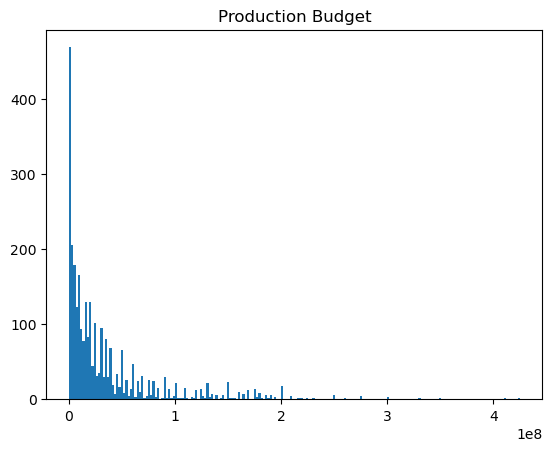

In [38]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["production_budget"], bins=200)
ax.set_title("Production Budget");

We will produce the `stats` function for `production_budget`

In [39]:
stats('production_budget')

 Mean:34287085.19637252
 Median:17000000.0
 Std:47672750.903373405



We will produce a histogram for `averagerating`

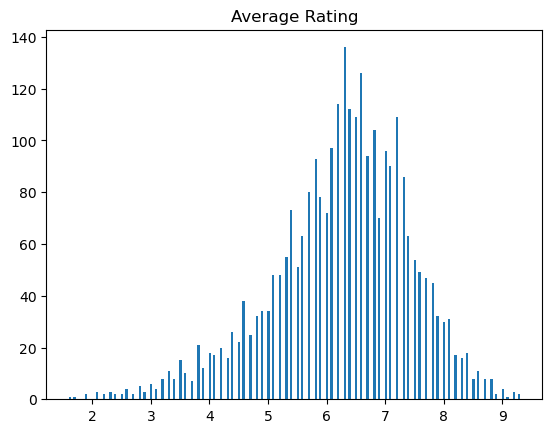

In [40]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["averagerating"], bins=200)
ax.set_title("Average Rating");

We will produce the `stats` function for `averagerating`

In [41]:
stats('averagerating')

 Mean:6.249110568538549
 Median:6.4
 Std:1.1859530886691918



We will produce a histogram for `numvotes`

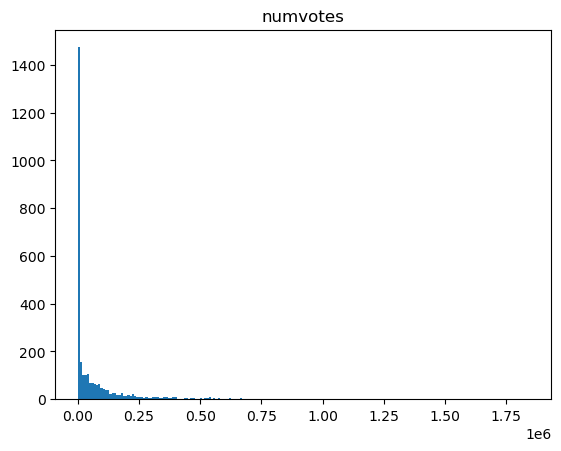

In [42]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["numvotes"], bins=200)
ax.set_title("numvotes");

We will produce the `stats` function for `numvotes`

In [43]:
stats('numvotes')

 Mean:66465.27659574468
 Median:7999.0
 Std:134449.32806695305



We will produce a histogram for `domestic_gross`

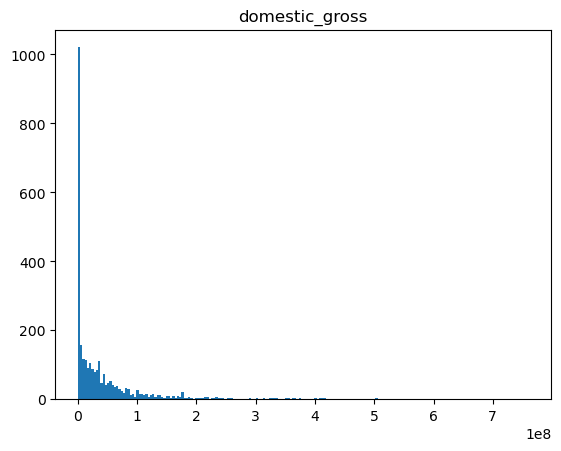

In [45]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["domestic_gross"], bins=200)
ax.set_title("domestic_gross");

We will produce the `stats` function for `domestic_gross`

In [46]:
stats('domestic_gross')

 Mean:43015135.7603767
 Median:16376066.0
 Std:74609315.36676295



We will produce a histogram for `worldwide_gross`

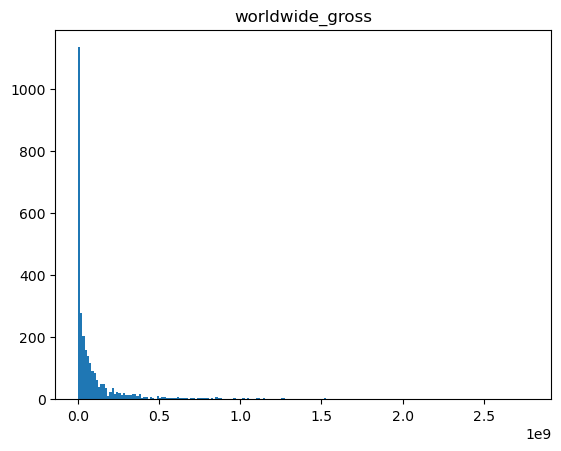

In [47]:
fig, ax = plt.subplots()
plt.hist(cleaned_df["worldwide_gross"], bins=200)
ax.set_title("worldwide_gross");

We will produce the `stats` function for `worldwide_gross`

In [48]:
stats('worldwide_gross')

 Mean:102880430.94000697
 Median:29960051.0
 Std:203929266.97751546



In [49]:
# compute the correlation matrix
corr_matrix = cleaned_df.corr()

# print the correlation matrix
corr_matrix

,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross
averagerating,1.000000,0.312122,0.010443,0.129830,0.177276,0.165638
numvotes,0.312122,1.000000,-0.005912,0.502965,0.563362,0.560655
id,0.010443,-0.005912,1.000000,-0.045565,-0.005440,-0.020782
production_budget,0.129830,0.502965,-0.045565,1.000000,0.716270,0.778746
domestic_gross,0.177276,0.563362,-0.005440,0.716270,1.000000,0.946493
worldwide_gross,0.165638,0.560655,-0.020782,0.778746,0.946493,1.000000


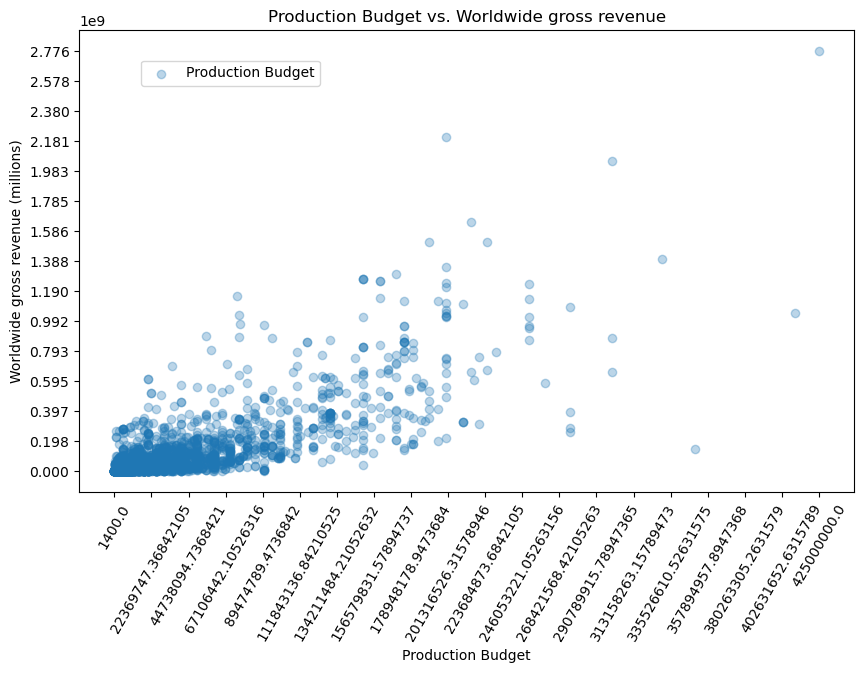

In [143]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    x=cleaned_df["production_budget"],
    y=cleaned_df["worldwide_gross"],
    alpha=0.3
)

ax.set_xlabel("Production Budget")
ax.set_ylabel("Worldwide gross revenue (millions)")
ax.set_title("Production Budget vs. Worldwide gross revenue")

# format the x-axis labels to two decimal places
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# xticks = np.linspace(start=min(cleaned_df["production_budget"]), stop=max(cleaned_df["production_budget"]), num=20)
# yticks = np.linspace(start=min(cleaned_df["worldwide_gross"]), stop=max(cleaned_df["worldwide_gross"]), num=20)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(xticks, rotation=60)
ax.legend(["Production Budget", "Worldwide gross"], loc=(.08, .88));

plt.savefig('plot.png')
plt.show()

In [85]:
from scipy.stats import pearsonr
corr_coef, p_value = pearsonr(cleaned_df["production_budget"], cleaned_df["worldwide_gross"])
print(corr_coef, p_value)

0.7787459767709454 0.0
